# **Customer Engagement Analytics**


### Necessary Imports

In [2]:
##Importing the ncessary libraries

#Dataframes makes it easier to handle/manipulate data
import pandas as pd
#For n-dimentional arrays and basic statistics and linear algebra
import numpy as np
#To make plots and graphs
import matplotlib.pyplot as plt
#For higher level rendering of statistical graphics
import seaborn as sns
#To have graphs included in the notebook
%matplotlib inline

### Reading and Exploring the dataset

In [3]:
#Reading the CSV
df=pd.read_csv('CustomerAnalytics.csv')

In [4]:
#To display the first 5 rows from the file
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
#To give information on the dataset such as number of entries, columns and names of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [9]:
'''Generates descriptive statistics that summarize the central tendency, 
dispersion and shape of a dataset’s distribution, excluding NaN values.'''
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


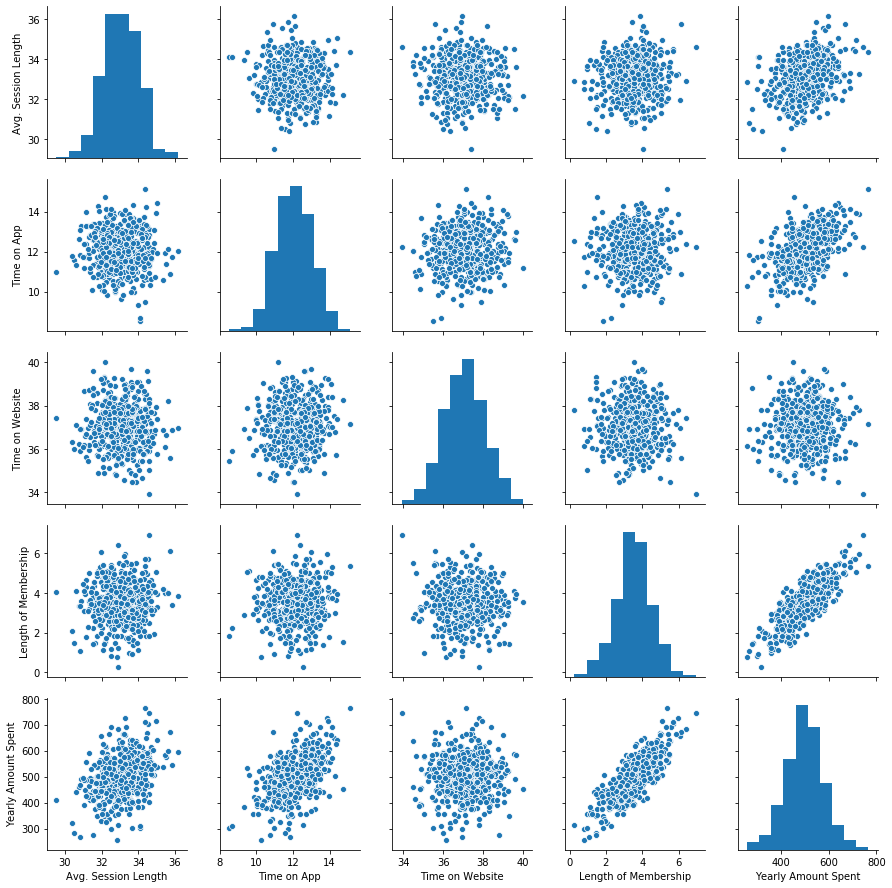

In [10]:
#Plot pairwise relationships in a dataset
sns.pairplot(df)

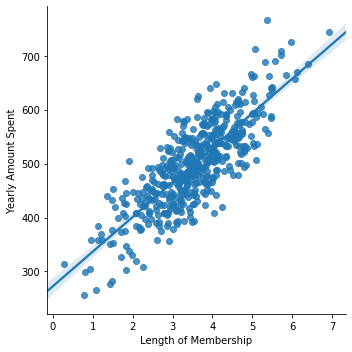

In [11]:
#Linear model plotting
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

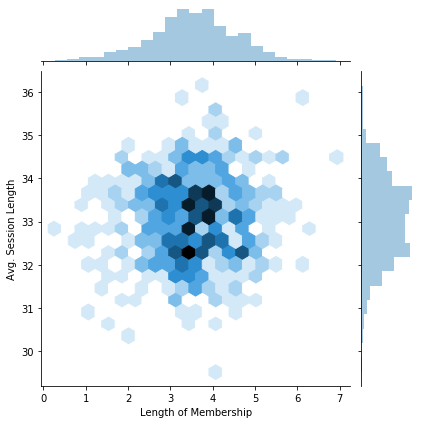

In [31]:
sns.jointplot(x='Length of Membership',y='Avg. Session Length',data=df,kind='hex')

## Splitting the Train and Test data


In [14]:
#To get the column names
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [15]:
#To plot our X variables against Y variables
X=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership' ]]

Y=df['Yearly Amount Spent']

In [21]:
#To split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [32]:
#test size is the proportion of data to reserve for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

### Training the model

In [23]:
#Importing the linear regression model
from sklearn.linear_model import LinearRegression

In [24]:
#Creating an instance of linear regression
lr=LinearRegression()
#Fitting the model to the training data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
coeff_df=pd.DataFrame(lr.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Running the trained model on test dataset

In [41]:
#Saving the predictions
predictions=lr.predict(X_test)

Text(0, 0.5, 'Y_predicted')

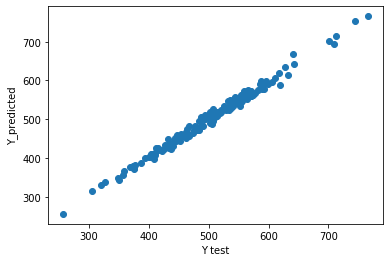

In [33]:
#Plotting the predictions
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Y_predicted')

### Model Evaluation

In [43]:
#To evaluate the model we import sklearn's metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy = lr.score(X_test,y_test)
print(accuracy*100,'%')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

98.90046246741234 %
MAE: 7.228148653430835
MSE: 79.81305165097443
RMSE: 8.933815066978633


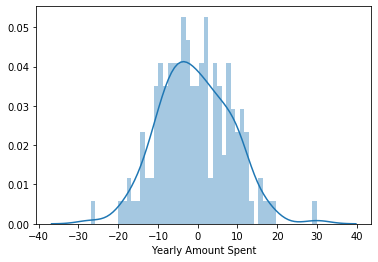

In [35]:
#Plotting the predictions
sns.distplot((y_test-predictions),bins=50);